In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import sys
sys.path.append('../../arxiv_cs/')

%load_ext autoreload
%autoreload 2

In [3]:
import json
import pandas as pd
import gzip
from pathlib import Path
from collections import Counter
import datetime
import re
import matplotlib.pyplot as plt

In [4]:
DATA_CLEAN_PATH = Path("../../data/clean")

In [5]:
df = pd.read_json(DATA_CLEAN_PATH / "arxiv_cs.json.gz")
# pd.to_datetime(df['date']).apply(lambda x: x.date())

df.head()

,id,authors,title,abstract,categories,primary_cat,date
0,0704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pe...",math.CO cs.CG,math.CO,2007-04-01
1,0704.0046,"I. Csiszar, F. Hiai and D. Petz",A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldmann...",quant-ph cs.IT math.IT,quant-ph,2007-04-01
2,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is d...,cs.NE cs.AI,cs.NE,2007-04-01
3,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emiss...,cs.NE cs.AI,cs.NE,2007-04-01
4,0704.0062,"Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Viterb...",cs.DS,cs.DS,2007-04-01


#### Size, duplicates and Nan's

In [6]:
df.id.size, sum(df.duplicated(['id']))

(241276, 0)

In [7]:
df.date.min(), df.date.max()

(Timestamp('1993-01-01 00:00:00'), Timestamp('2019-11-01 00:00:00'))

In [8]:
df.isna().any()

id             False
authors        False
title          False
abstract       False
categories     False
primary_cat    False
date           False
dtype: bool

In [9]:
df.describe()

,id,authors,title,abstract,categories,primary_cat,date
count,241276,241276,241276,241276,241276,241276,241276
unique,241276,208248,240967,241047,20595,157,317
top,1012.2164,David Eppstein,Discussion: Latent variable graphical model se...,This paper has been withdrawn.,cs.CV,cs.CV,2019-10-01 00:00:00
freq,1,55,4,10,19564,27173,5450
first,NaN,NaN,NaN,NaN,NaN,NaN,1993-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 00:00:00


In [10]:
df.date = pd.to_datetime(df['date']).apply(lambda x: x.date())

In [11]:
df.date[0], type(df.date[0])

(datetime.date(2007, 4, 1), datetime.date)

In [12]:
sum(df.date > datetime.date(2019, 10, 31))

947

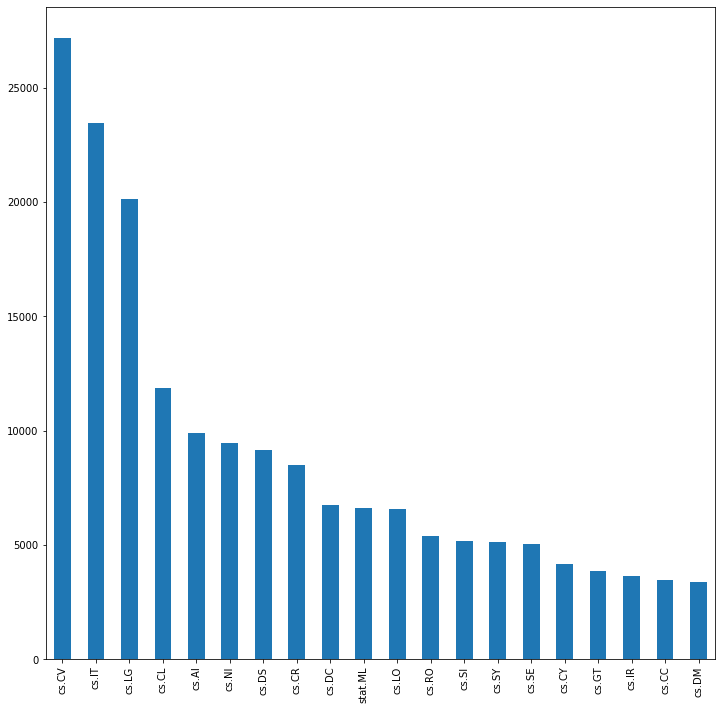

In [14]:
df.primary_cat.value_counts().nlargest(20).plot(kind='bar', figsize=(12, 12))